# Imported Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import ParameterGrid

from tqdm import tqdm

import Utils as ut

# Read Data

In [2]:
stocks_by_id = pd.read_csv(
'C:/Users/manor/Desktop/Final Project - Algotrading/First Developement Step/Database/stocks_by_id.csv',
names=['id',
       'stock'
      ],
header=None)

In [3]:
end_of_day_prices = pd.read_csv(
        'C:/Users/manor/Desktop/Final Project - Algotrading/First Developement Step/Database/end_of_day_prices.csv',
        names=['id',
               'date',
               'close_price'],
header=None)

# Exploratory Data Analysis

## IDs of all stocks

In [37]:
stocks_by_id

,id,stock
0,1,MMM
1,2,AOS
2,3,ABT
3,4,ABBV
4,5,ABMD
...,...,...
498,499,YUM
499,500,ZBRA
500,501,ZBH
501,502,ZION


## Closing price by stock id and date

In [5]:
end_of_day_prices

,id,date,close_price
1,1,2012-01-03,83.49
2,1,2012-01-04,84.18
3,1,2012-01-05,83.80
4,1,2012-01-06,83.37
5,1,2012-01-09,83.87
...,...,...,...
1322251,503,2022-11-21,147.33
1322252,503,2022-11-22,148.63
1322253,503,2022-11-23,150.47
1322254,503,2022-11-25,150.10


## We chose to use 'MMM' stock id: 1

In [6]:
mmm_data = end_of_day_prices.loc[end_of_day_prices.id == 1].copy()

## Exploratory Data Analysis

Stock Data

In [7]:
mmm_data

,id,date,close_price
1,1,2012-01-03,83.49
2,1,2012-01-04,84.18
3,1,2012-01-05,83.80
4,1,2012-01-06,83.37
5,1,2012-01-09,83.87
...,...,...,...
2741,1,2022-11-21,127.63
2742,1,2022-11-22,128.60
2743,1,2022-11-23,128.00
2744,1,2022-11-25,129.04


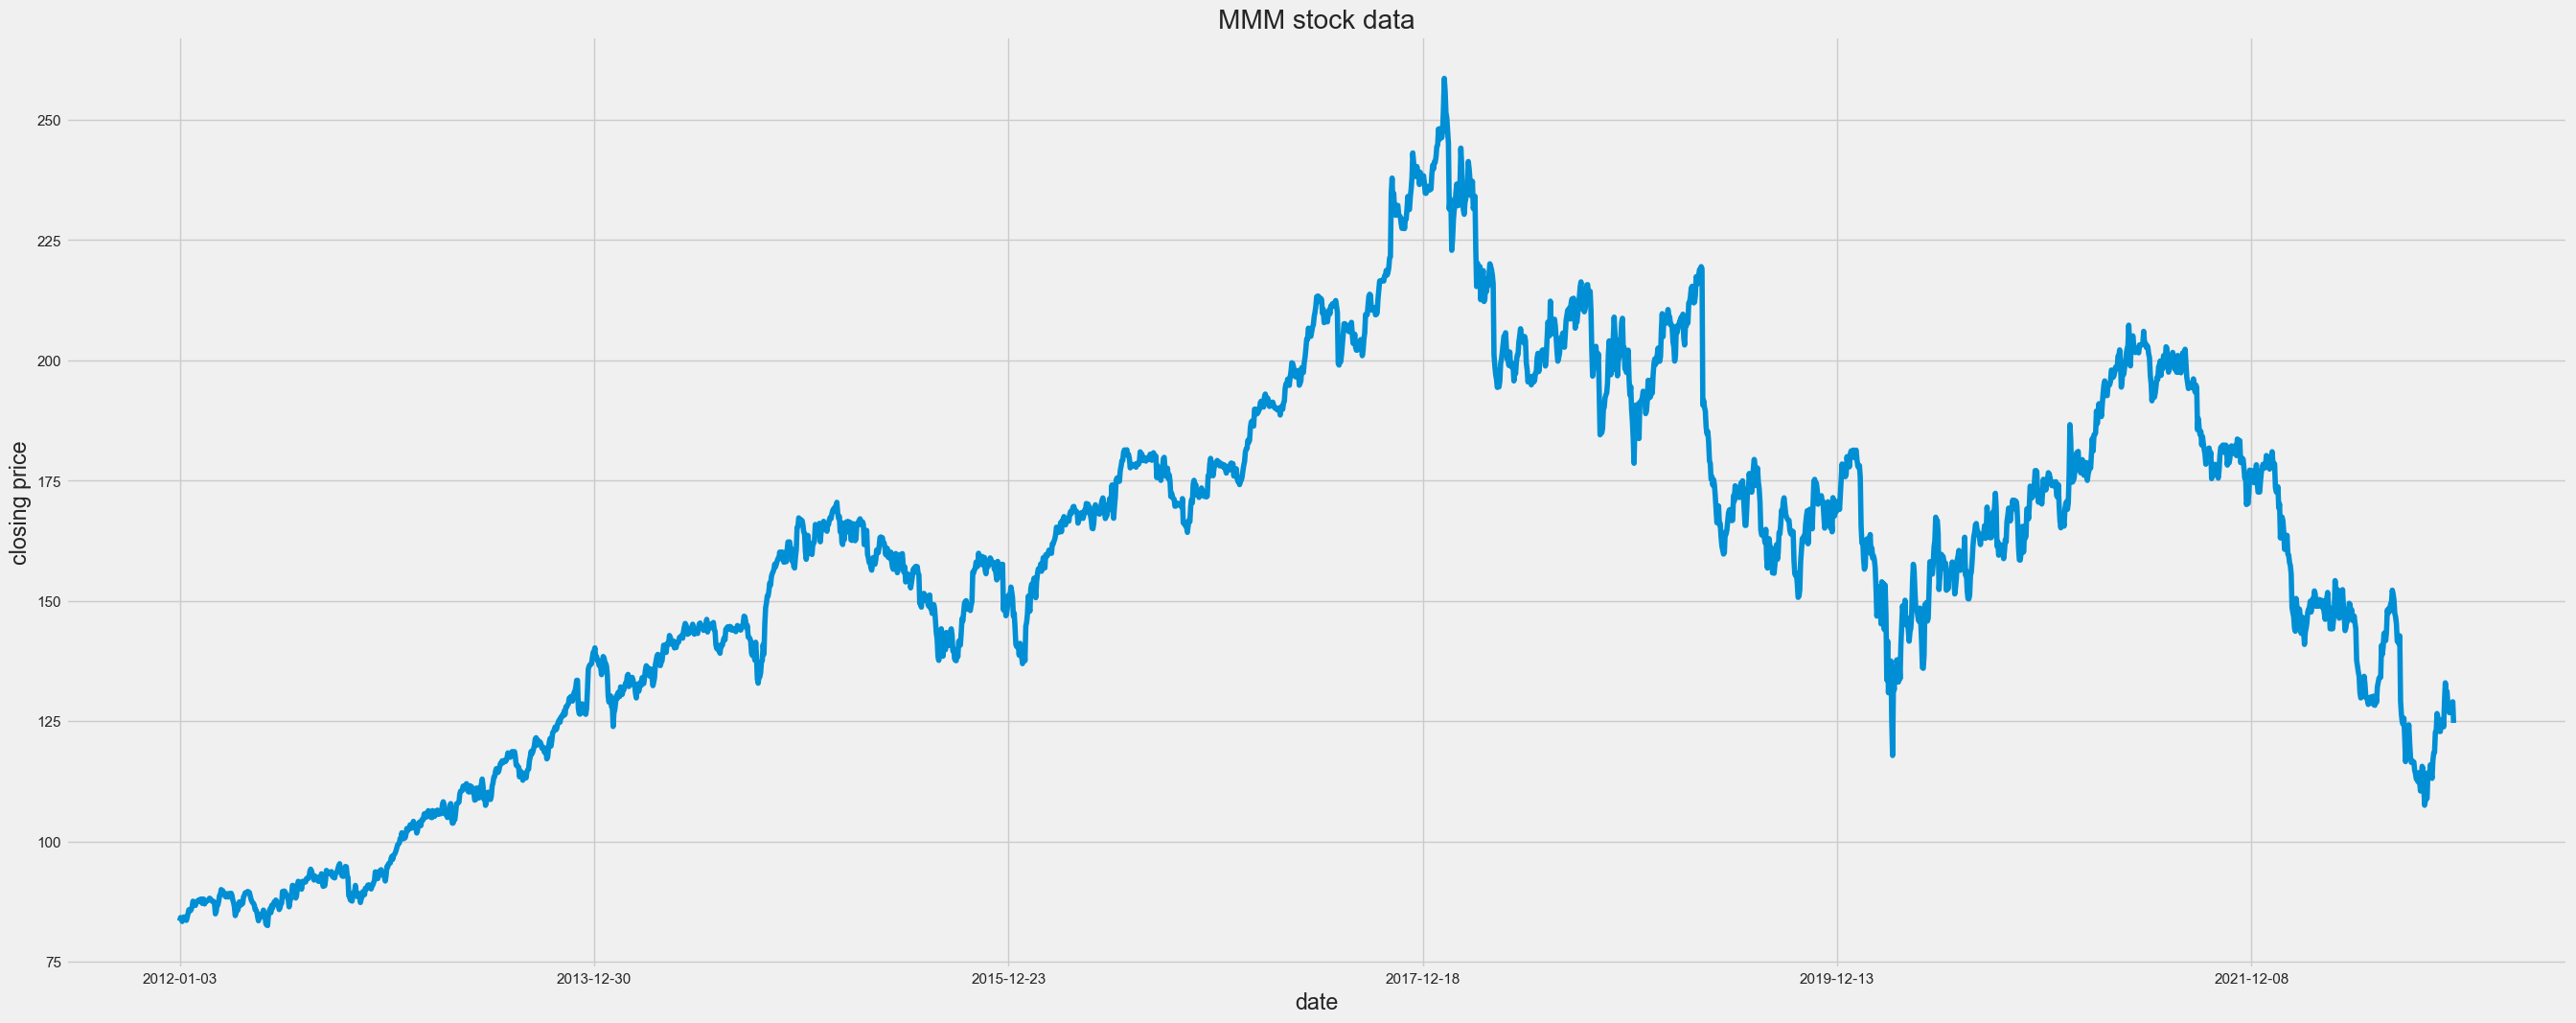

In [8]:
sns.set()
plt.style.use('fivethirtyeight')
mmm_data.plot(x='date', y='close_price', figsize=(30, 12), legend=False)
plt.xlabel('date')
plt.ylabel('closing price')
plt.title('MMM stock data')
plt.show()

Some of the dates were missing, we filled them using the average of the past 2 days prior to the missing date

In [9]:
EDA = ut.Exploratory()

# count number of NaN values
nan_count = EDA.count_nan_values(mmm_data)
print("Number of NaN values in the table: ", nan_count)

Number of NaN values in the table:  0


In [10]:
# results of the missing_dates_detection function:
gap_sizes_table, date_gaps, missing_dates = EDA.missing_dates_detection(mmm_data)

gap_sizes_table

,Gap Size
0,4
1,3
2,3
3,3
4,3
...,...
2739,0
2740,0
2741,0
2742,0


<Axes: xlabel='Gap Size'>

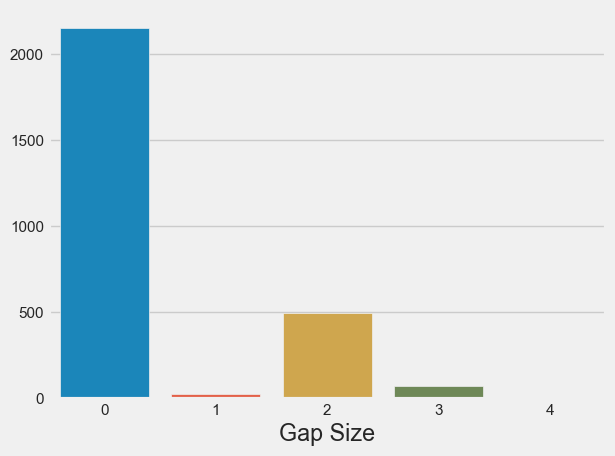

In [11]:
number_of_gaps = pd.value_counts(gap_sizes_table['Gap Size']).values
gap_sizes = pd.value_counts(gap_sizes_table['Gap Size']).keys()

sns.barplot(x = gap_sizes, y = number_of_gaps)

In [12]:
percentage_of_missing = ((missing_dates/(missing_dates + mmm_data.shape[0])) * 100)

print("Number of missing dates: ", missing_dates)
print(f'Percentage of missing dates: {percentage_of_missing}%')

Number of missing dates:  1238
Percentage of missing dates: 31.08209892041175%


# Preprocessing

In [13]:
mmm_data['date']

1       2012-01-03
2       2012-01-04
3       2012-01-05
4       2012-01-06
5       2012-01-09
           ...    
2741    2022-11-21
2742    2022-11-22
2743    2022-11-23
2744    2022-11-25
2745    2022-11-28
Name: date, Length: 2745, dtype: object

In [14]:
preprocess = ut.DataPreprocessor()

In [15]:
raw_and_missing, missing = preprocess.add_missing_dates(mmm_data, 2)

In [16]:
# print the table of raw and missing dates:

raw_and_missing

,id,date,close_price
0,1,2012-01-03,83.490
1,1,2012-01-04,84.180
2,1,2012-01-05,83.800
3,1,2012-01-06,83.370
4,1,2012-01-07,83.585
...,...,...,...
3978,1,2022-11-24,128.300
3979,1,2022-11-25,129.040
3980,1,2022-11-26,128.670
3981,1,2022-11-27,128.855


In [17]:
# print the table of the missing dates:

missing

,id,date,close_price
0,1,2012-01-07,83.5850
1,1,2012-01-08,83.4775
2,1,2012-01-14,83.9400
3,1,2012-01-15,83.7700
4,1,2012-01-16,83.8550
...,...,...,...
1233,1,2022-11-19,126.9550
1234,1,2022-11-20,126.8575
1235,1,2022-11-24,128.3000
1236,1,2022-11-26,128.6700


In [18]:
# Validate that the number of missing rows were inserted to the raw data:

missing.shape[0] + mmm_data.shape[0] == raw_and_missing.shape[0]

True

In [18]:
# raw data

preprocess.alter_table(mmm_data, 'date', 'id')

# missing data

preprocess.alter_table(missing, 'date', 'id')

# raw_and_missing data

preprocess.alter_table(raw_and_missing, 'date', 'id')

In [19]:
mmm_data

,close_price
date,
2012-01-03,83.49
2012-01-04,84.18
2012-01-05,83.80
2012-01-06,83.37
2012-01-09,83.87
...,...
2022-11-21,127.63
2022-11-22,128.60
2022-11-23,128.00


In [20]:
missing

,close_price
date,
2012-01-07,83.5850
2012-01-08,83.4775
2012-01-14,83.9400
2012-01-15,83.7700
2012-01-16,83.8550
...,...
2022-11-19,126.9550
2022-11-20,126.8575
2022-11-24,128.3000


In [21]:
raw_and_missing

,close_price
date,
2012-01-03,83.490
2012-01-04,84.180
2012-01-05,83.800
2012-01-06,83.370
2012-01-07,83.585
...,...
2022-11-24,128.300
2022-11-25,129.040
2022-11-26,128.670


# Model Training

In [22]:
# running random forest on multiple options of 'days before'(= n):

activate_model = ut.ModelActivator()

days_before_list = [1, 3, 5, 7]#list(range(7, 37, 10))

features_names_list = []

all_params_and_mse_df = pd.DataFrame(columns=['parameters set', 'feature importances', 'train mse', 'test mse'])

best_params_and_mse_df = pd.DataFrame(columns=['days before', 'feature importances', 'parameters set', 'train mse', 'test mse'])

rf_full_params = {'n_estimators': [50, 100, 200],  # The number of trees in the forest
                'max_depth': [None, 5, 7, 9], # The maximum depth of the tree.
                                            # If None, then nodes are expanded until all leaves are pure or until all leaves contain less   than min_samples_split samples
                'min_samples_split': [2, 10, 20, 30],
                'max_features': [1, 3, 5, 7],  # The number of features to consider when looking for the best split results
                'random_state': [None, 0, 711] # The randomness of the bootstrapping of the samples used when building trees and                                the sampling of the features to consider when looking for the best split at each node
                }

all_rf_params_permutations = list(ParameterGrid(rf_full_params))

for n in tqdm(days_before_list, desc='lookback days'):
    
    # create lookback features
    raw_and_missing_new = preprocess.create_features(raw_and_missing, n, 'close_price', '_days_ago', 'tomorrow')
    
    # drop all missing dates - since we want to prevent our model from learning the connections between each closing price
    raw_and_missing_new =  preprocess.drop_missing_dates(raw_and_missing_new, missing)

    ## Temporal splitting to train and test:
    split_date = preprocess.generate_split_date(raw_and_missing_new) # train size was set to 0.8 of data size

    train = raw_and_missing_new.iloc[raw_and_missing_new.index <= split_date].copy()
    test = raw_and_missing_new.loc[raw_and_missing_new.index > split_date].copy()

    # remove rows and split the data to X and y:
    X_train, y_train = preprocess.rmv_nans_splt_Xy(train, 'tomorrow')
    X_test, y_test = preprocess.rmv_nans_splt_Xy(test, 'tomorrow')
    
    # find best parameters for every 'n' number of days before based on lowest test mse
    for params in tqdm(all_rf_params_permutations, desc="model params"):
    
    # train model, return train mse, test mse and feature importances
        train_mse, test_mse, feature_importances = activate_model.run_random_forest(X_train, y_train, X_test, y_test, params)
        

    #add all trained combinations of parameters to a dataframe along with their train mse and test mse     
        all_params_and_mse_df.loc[len(all_params_and_mse_df)] = pd.Series({
                                                                            'parameters set':params,
                                                                            'feature importances':feature_importances,
                                                                            'train mse':train_mse,
                                                                            'test mse':test_mse
                                                                        })
    #get best test mse, which is the lowest test mse
    best_test_mse = all_params_and_mse_df['test mse'].min()
    
    #get the entire row with best test mse
    best_row = all_params_and_mse_df[all_params_and_mse_df['test mse'] == best_test_mse]
    
    #put the lookback days along with the best row in a dataframe 
    best_params_and_mse_df.loc[len(best_params_and_mse_df)] = pd.Series({
                                                                'days before':n,
                                                                'parameters set':best_row['parameters set'].values[0],
                                                                'feature importances':best_row['feature importances'].values,
                                                                'train mse':float(best_row['train mse'].values),
                                                                'test mse':float(best_row['test mse'].values)
                                                                })
    all_params_and_mse_df = pd.DataFrame(columns=['parameters set', 'feature importances', 'train mse', 'test mse'])
    features_names_list.append(X_test.columns)

lookback days: 100%|██████████| 4/4 [1:06:46<00:00, 1001.55s/it]


In [23]:
#results for 1, 3, 5, 7 lookback features
best_params_and_mse_df[['days before', 'train mse', 'test mse']]

,days before,train mse,test mse
0,1,3.021355,4.894673
1,3,2.880821,4.92036
2,5,2.751874,5.010081
3,7,2.941381,5.001993


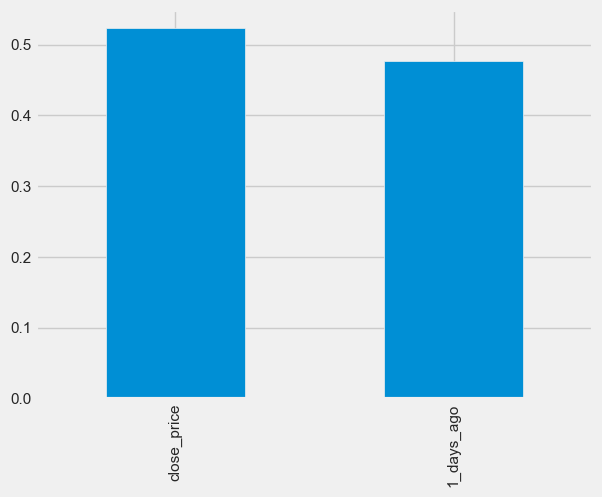

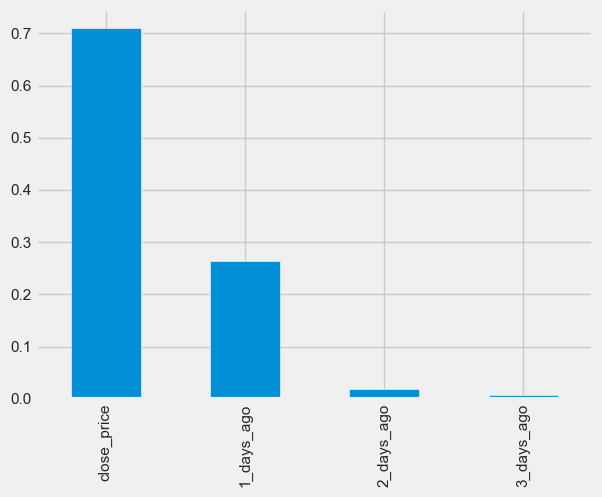

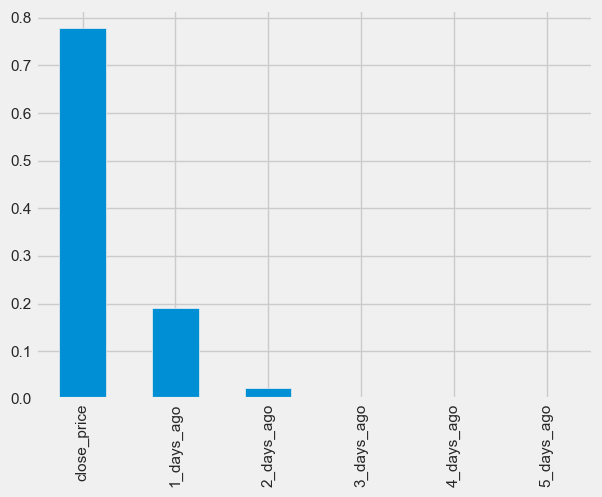

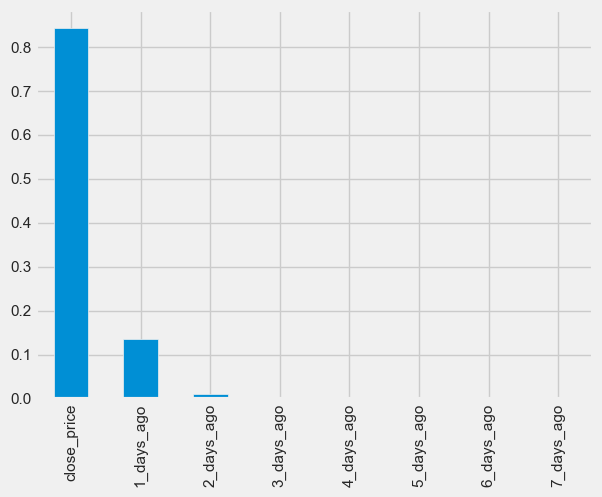

In [51]:
for i in range(len(days_before_list)):
    forest_importances_df = pd.DataFrame(best_params_and_mse_df['feature importances'][i][0], index=features_names_list[i])
    forest_importances_df.plot.bar(legend=False)

<Axes: >

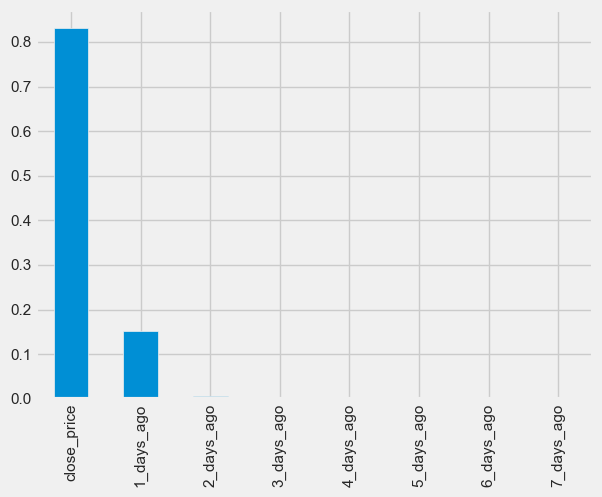

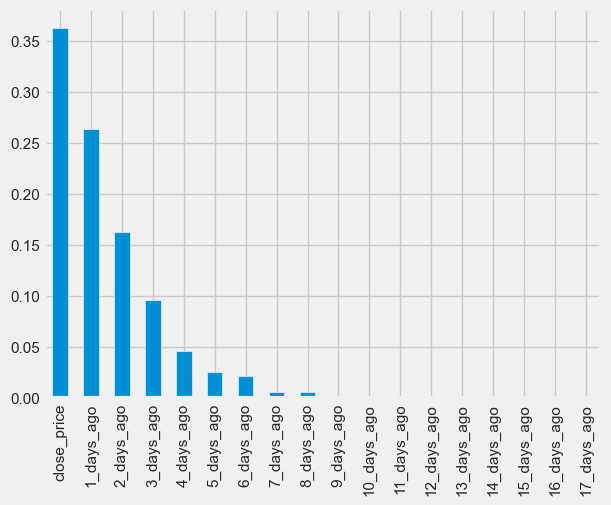

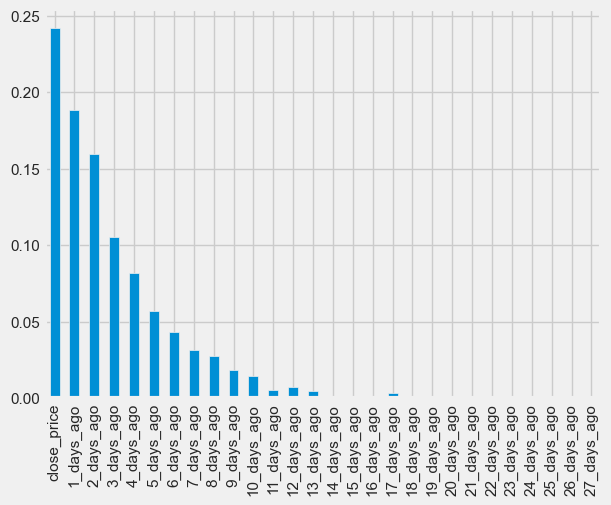

In [58]:
for i in range(len(days_before_list)):
    forest_importances_df = pd.DataFrame(best_params_and_mse_df['feature importances'][i][0], index=features_names_list[i])
    forest_importances_df.plot.bar(legend=False)

In [60]:
#results for 7, 17, 27 lookback features
best_params_and_mse_df[['days before', 'train mse', 'test mse']]

,days_before,train mse,test mse
0,7,2.936824,5.025977
1,17,2.367183,5.715079
2,27,0.625629,6.991351
